Установка всех необходимых программ и скачивание файлов

In [27]:
! ln -s /usr/share/data-minor-bioinf/WGBS/SRR3824222_1_bismark_bt2_pe.bam SRR3824222_1_bismark_bt2_pe.bam
! ln -s /usr/share/data-minor-bioinf/WGBS/SRR5836473_1_bismark_bt2_pe.bam SRR5836473_1_bismark_bt2_pe.bam
! ln -s /usr/share/data-minor-bioinf/WGBS/SRR5836475_1_bismark_bt2_pe.bam SRR5836475_1_bismark_bt2_pe.bam

In [ ]:
! ln -s /usr/share/data-minor-bioinf/FastQC/fastqc fastqc
! wget https://github.com/FelixKrueger/Bismark/archive/master.zip
! unzip master.zip
! rm master.zip
! ln -s Bismark-master/bismark bismark
! ln -s Bismark-master/deduplicate_bismark deduplicate_bismark
! ln -s Bismark-master/bismark_methylation_extractor bismark_methylation_extractor
! ln -s Bismark-master/bismark2report bismark2report
! pip install pyGenomeTracks
! wget https://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/bedGraphToBigWig
! wget https://hgdownload.soe.ucsc.edu/admin/exe/linux.x86_64/fetchChromSizes
! chmod +x fetchChromSizes bedGraphToBigWig
! wget https://github.com/arq5x/bedtools2/releases/download/v2.31.0/bedtools.static
! mv bedtools.static bedtools
! chmod +x bedtools
! pip install seaborn

In [3]:
! samtools view SRR5836473_1_bismark_bt2_pe.bam | head

SRR5836473.41_41_length=140	99	chr11	40076664	0	140M	=	40076703	178	AATTTTTTTGGGGATTGTATTGAATTTGTAGATTGTTTTTGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATT	KKKKKKKKKKKKKKKFKKKKKKKKKKKKKKFKKKKKKKKKFKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKF7<77FF	NM:i:28	MD:Z:6G0A9C7C9C6C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C1	XM:Z:.................h.......x.........h......h.......hh.......h.........hx..hh...hh.....h.........h...hh..h..x......h..h........h...h..x.....h.	XR:Z:CT	XG:Z:CT
SRR5836473.41_41_length=140	147	chr11	40076703	0	139M	=	40076664	-178	TGGTAAGAGAGTTATTTTTATTATATTGATTTTGTTAATTTATGAATATGGGAGATTTTTTTATTTTTTGAGATTTTTTTTAATTTTTTTTTTTAGAGATTTGAAGTTTTTATTATATAGATTTTTTATTTTTTTAGTG	KKKKKAAFFFKKKKKKKKKKKKKFFKKKKKKKKKKFAFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKFKKKKKKKKKKKKFKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKKK	NM:i:31	MD:Z:3C4T2C0C7C9C0C2C0C3C0C5C9C3C0C2C2C6C2C8C3C2C5C8C4C3A4C

Сортируем и индексируем

In [29]:
! samtools sort SRR5836473_1_bismark_bt2_pe.bam -o s8cell.bam
! samtools sort SRR5836475_1_bismark_bt2_pe.bam -o sicm.bam
! samtools sort SRR3824222_1_bismark_bt2_pe.bam -o sepiblast.bam
! samtools index s8cell.bam
! samtools index sicm.bam
! samtools index sepiblast.bam

[bam_sort_core] merging from 4 files and 1 in-memory blocks...
[bam_sort_core] merging from 5 files and 1 in-memory blocks...
[bam_sort_core] merging from 9 files and 1 in-memory blocks...


Сколько закартировалось на регионы 11347700-11367700 и 40185800-40195800

In [30]:
! samtools view s8cell.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view s8cell.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

551
194


In [31]:
! samtools view sicm.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sicm.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

797
274


In [32]:
! samtools view sepiblast.bam chr11:11347700-11367700 | cut -f1 | sort -u | wc -l
! samtools view sepiblast.bam chr11:40185800-40195800 | cut -f1 | sort -u | wc -l

1344
565


In [34]:
! rm s8cell.bam sicm.bam sepiblast.bam

Дедупликация

In [36]:
! ./deduplicate_bismark --bam --paired SRR5836473_1_bismark_bt2_pe.bam

Processing paired-end Bismark output file(s) (SAM format):
SRR5836473_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836473_1_bismark_bt2_pe.bam<< for signs of file truncation...

samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


Now testing Bismark result file SRR5836473_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: SRR5836473_1_bismark_bt2_pe.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR58

In [37]:
! ./deduplicate_bismark --bam --paired SRR5836475_1_bismark_bt2_pe.bam

Processing paired-end Bismark output file(s) (SAM format):
SRR5836475_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR5836475_1_bismark_bt2_pe.bam<< for signs of file truncation...

samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


Now testing Bismark result file SRR5836475_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: SRR5836475_1_bismark_bt2_pe.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR5836475_1.fq -2 SRR5836475_2.fq"
skipping header line:	@PG	ID:samtools	PN:samtools	PP

In [38]:
! ./deduplicate_bismark --bam --paired SRR3824222_1_bismark_bt2_pe.bam

Processing paired-end Bismark output file(s) (SAM format):
SRR3824222_1_bismark_bt2_pe.bam


If there are several alignments to a single position in the genome the first alignment will be chosen. Since the input files are not in any way sorted this is a near-enough random selection of reads.

Checking file >>SRR3824222_1_bismark_bt2_pe.bam<< for signs of file truncation...

samtools view: writing to standard output failed: Broken pipe
samtools view: error closing standard output: -1


Now testing Bismark result file SRR3824222_1_bismark_bt2_pe.bam for positional sorting (which would be bad...)	...passed!
Output file is: SRR3824222_1_bismark_bt2_pe.deduplicated.bam

skipping header line:	@HD	VN:1.0	SO:unsorted
skipping header line:	@SQ	SN:chr11	LN:121973369
skipping header line:	@PG	ID:Bismark	VN:v0.24.2	CL:"bismark --genome_folder /mnt/cache-1/for_minor/mm39_11/ -q --non_directional -parallel 10 -1 SRR3824222_1.fq,SRR5836473_1.fq,SRR5836473_1.fq -2 SRR3824222_2.fq,SRR5836473_2.fq,SRR58

Статистика

|          | 11347700-11367700 | 40185800-40195800 | duplicated % |
|----------|-------------------|-------------------|--------------|
| 8 Cell   | 551               | 194               | 81.72        |
| ICM      | 797               | 274               | 90.93        |
| Epiblast | 1344              | 565               | 97.09        |

Скачиваем 11-ю хромосому мыши

In [39]:
! wget "https://ftp.ensembl.org/pub/release-111/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.11.fa.gz"
! gunzip Mus_musculus.GRCm39.dna.chromosome.11.fa.gz
! mkdir mouse_chr
! mv Mus_musculus.GRCm39.dna.chromosome.11.fa mouse_chr/

--2024-02-13 03:35:29--  https://ftp.ensembl.org/pub/release-111/fasta/mus_musculus/dna/Mus_musculus.GRCm39.dna.chromosome.11.fa.gz
Resolving ftp.ensembl.org (ftp.ensembl.org)... 193.62.193.169
Connecting to ftp.ensembl.org (ftp.ensembl.org)|193.62.193.169|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36137719 (34M) [application/x-gzip]
Saving to: ‘Mus_musculus.GRCm39.dna.chromosome.11.fa.gz’

Mus_musculus.GRCm39 100%[===================>]  34,46M   740KB/s    in 48s     

2024-02-13 03:36:19 (739 KB/s) - ‘Mus_musculus.GRCm39.dna.chromosome.11.fa.gz’ saved [36137719/36137719]



Коллинг метилирования

In [41]:
! ./bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr SRR5836473_1_bismark_bt2_pe.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file SRR5836473_1_bismark_bt2_pe.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/home/erportnyagin/src/hse24_hw1')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a c

In [42]:
! ./bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr SRR5836475_1_bismark_bt2_pe.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file SRR5836475_1_bismark_bt2_pe.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/home/erportnyagin/src/hse24_hw1')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a c

In [43]:
! ./bismark_methylation_extractor --gzip --bedGraph --cytosine_report --genome_folder ./mouse_chr SRR3824222_1_bismark_bt2_pe.deduplicated.bam


 *** Bismark methylation extractor version v0.24.2 ***

Trying to determine the type of mapping from the SAM header line of file SRR3824222_1_bismark_bt2_pe.deduplicated.bam
Treating file(s) as paired-end data (as extracted from @PG line)

Setting option '--no_overlap' since this is (normally) the right thing to do for paired-end data


Setting core usage to single-threaded (default). Consider using --multicore <int> to speed up the extraction process.

Summarising Bismark methylation extractor parameters:
Bismark paired-end SAM format specified (default)
Number of cores to be used: 1
Output will be written to the current directory ('/home/erportnyagin/src/hse24_hw1')


Summarising bedGraph parameters:
Generating additional output in bedGraph and coverage format
bedGraph format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage>
coverage format:	<Chromosome> <Start Position> <End Position> <Methylation Percentage> <count methylated> <count non-methylated>

Using a c

Скачиваем отчёты выравнивания

In [ ]:
! gdown https://drive.google.com/uc?id=1L-kZURPu5A7QHxEz8d2pnH-cfaWlYggP
! gdown https://drive.google.com/uc?id=1ybuIMaW1BWdz-ehkzg7BmlZVWu4R6pte
! gdown https://drive.google.com/uc?id=1RC6FJEmdWwz8iGwBTJdEcf08wwHHyp1x

Создаём отчёты

In [73]:
! ./bismark2report --alignment_report SRR5836473_1_bismark_bt2_PE_report.txt --mbias_report SRR5836473_1_bismark_bt2_pe.deduplicated.M-bias.txt --dedup_report SRR5836473_1_bismark_bt2_pe.deduplication_report.txt --splitting_report SRR5836473_1_bismark_bt2_pe.deduplicated_splitting_report.txt

User specifified dedup report: SRR5836473_1_bismark_bt2_pe.deduplication_report.txt

Writing Bismark HTML report to >> SRR5836473_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836473_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836473_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> SRR5836473_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report SRR5836473_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

Using the following splitting report:		> SRR5836473_1_bismark_bt2_pe.deduplicated_splitting_report.txt <
Processing splitting report SRR5836473_1_bismark_bt2_pe.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> SRR5836473_1_bismark_bt2_pe.deduplicated.M-bias.txt <
Processing M-bias report SRR5836473_1_bismark_bt2_pe.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [74]:
! ./bismark2report --alignment_report SRR5836475_1_bismark_bt2_PE_report.txt --mbias_report SRR5836475_1_bismark_bt2_pe.deduplicated.M-bias.txt --dedup_report SRR5836475_1_bismark_bt2_pe.deduplication_report.txt --splitting_report SRR5836475_1_bismark_bt2_pe.deduplicated_splitting_report.txt

User specifified dedup report: SRR5836475_1_bismark_bt2_pe.deduplication_report.txt

Writing Bismark HTML report to >> SRR5836475_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR5836475_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR5836475_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> SRR5836475_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report SRR5836475_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

Using the following splitting report:		> SRR5836475_1_bismark_bt2_pe.deduplicated_splitting_report.txt <
Processing splitting report SRR5836475_1_bismark_bt2_pe.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> SRR5836475_1_bismark_bt2_pe.deduplicated.M-bias.txt <
Processing M-bias report SRR5836475_1_bismark_bt2_pe.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [75]:
! ./bismark2report --alignment_report SRR3824222_1_bismark_bt2_PE_report.txt --mbias_report SRR3824222_1_bismark_bt2_pe.deduplicated.M-bias.txt --dedup_report SRR3824222_1_bismark_bt2_pe.deduplication_report.txt --splitting_report SRR3824222_1_bismark_bt2_pe.deduplicated_splitting_report.txt

User specifified dedup report: SRR3824222_1_bismark_bt2_pe.deduplication_report.txt

Writing Bismark HTML report to >> SRR3824222_1_bismark_bt2_PE_report.html <<

Using the following alignment report:		> SRR3824222_1_bismark_bt2_PE_report.txt <
Processing alignment report SRR3824222_1_bismark_bt2_PE_report.txt ...
Complete

Using the following deduplication report:	> SRR3824222_1_bismark_bt2_pe.deduplication_report.txt <
Processing deduplication report SRR3824222_1_bismark_bt2_pe.deduplication_report.txt ...
Complete

Using the following splitting report:		> SRR3824222_1_bismark_bt2_pe.deduplicated_splitting_report.txt <
Processing splitting report SRR3824222_1_bismark_bt2_pe.deduplicated_splitting_report.txt ...
Complete

Using the following M-bias report:		> SRR3824222_1_bismark_bt2_pe.deduplicated.M-bias.txt <
Processing M-bias report SRR3824222_1_bismark_bt2_pe.deduplicated.M-bias.txt ...
Complete

No nucleotide coverage report file specified, skipping this step




In [3]:
! gzip -d SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph.gz
! gzip -d SRR5836475_1_bismark_bt2_pe.deduplicated.bedGraph.gz
! gzip -d SRR3824222_1_bismark_bt2_pe.deduplicated.bedGraph.gz

! gzip -d SRR5836473_1_bismark_bt2_pe.deduplicated.bismark.cov.gz
! gzip -d SRR5836475_1_bismark_bt2_pe.deduplicated.bismark.cov.gz
! gzip -d SRR3824222_1_bismark_bt2_pe.deduplicated.bismark.cov.gz

In [5]:
! head SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [6]:
! head SRR5836473_1_bismark_bt2_pe.deduplicated.bismark.cov

chr11	3050031	3050031	50	1	1
chr11	3050048	3050048	66.6666666666667	2	1
chr11	3050049	3050049	50	1	1
chr11	3050224	3050224	87.5	7	1
chr11	3050225	3050225	53.3333333333333	8	7
chr11	3050286	3050286	66.6666666666667	6	3
chr11	3050287	3050287	33.3333333333333	5	10
chr11	3050310	3050310	62.5	5	3
chr11	3050311	3050311	50	7	7
chr11	3050349	3050349	55.5555555555556	5	4


In [12]:
! ./fetchChromSizes mm10 > m.chrom.sizes

INFO: trying CURL  for database mm10
url: http://hgdownload.soe.ucsc.edu/goldenPath/mm10/bigZips/mm10.chrom.sizes


In [21]:
! ./bedGraphToBigWig  SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph m.chrom.sizes cell8_methylation.bigWig
! ./bedGraphToBigWig  SRR5836475_1_bismark_bt2_pe.deduplicated.bedGraph m.chrom.sizes icm_methylation.bigWig
! ./bedGraphToBigWig  SRR3824222_1_bismark_bt2_pe.deduplicated.bedGraph m.chrom.sizes epiblast_methylation.bigWig

In [15]:
! head SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph

track type=bedGraph
chr11	3050030	3050031	50
chr11	3050047	3050048	66.6666666666667
chr11	3050048	3050049	50
chr11	3050223	3050224	87.5
chr11	3050224	3050225	53.3333333333333
chr11	3050285	3050286	66.6666666666667
chr11	3050286	3050287	33.3333333333333
chr11	3050309	3050310	62.5
chr11	3050310	3050311	50


In [38]:
! ./bedtools genomecov -bg -ibam SRR5836473_1_bismark_bt2_pe.deduplicated.bam -g m.chromSizes > SRR5836473_1.cover.bedGraph
! ./bedtools genomecov -bg -ibam SRR5836475_1_bismark_bt2_pe.deduplicated.bam -g m.chromSizes > SRR5836475_1.cover.bedGraph
! ./bedtools genomecov -bg -ibam SRR3824222_1_bismark_bt2_pe.deduplicated.bam -g m.chromSizes > SRR3824222_1.cover.bedGraph


*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****

*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****

*****
*****WARNING: Genome (-g) files are ignored when BAM input is provided. 
*****


In [47]:
import pandas as pd
import matplotlib.pyplot as plt

Визуализация распределения метилирования

In [70]:
def visualize(filename: str):
    data = pd.read_csv(filename, skiprows=1, delimiter='\t', header=None)
    plt.title(filename.split('_')[0])
    plt.hist(data[3], density=True)
    plt.show()

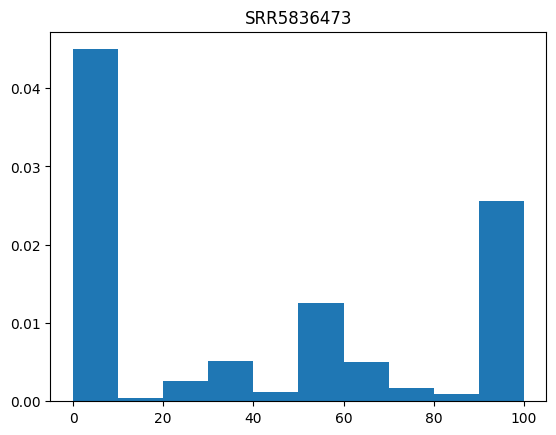

In [71]:
visualize("SRR5836473_1_bismark_bt2_pe.deduplicated.bedGraph")

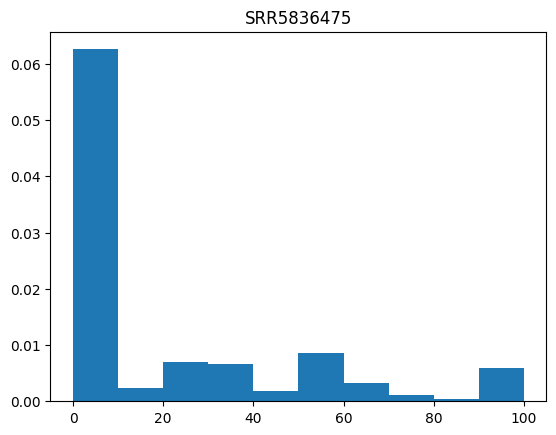

In [72]:
visualize("SRR5836475_1_bismark_bt2_pe.deduplicated.bedGraph")

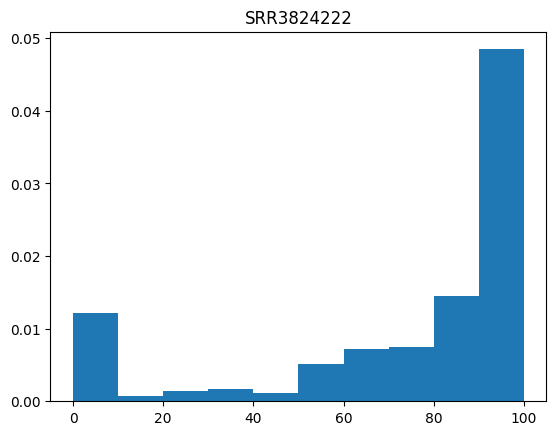

In [73]:
visualize("SRR3824222_1_bismark_bt2_pe.deduplicated.bedGraph")

Визуализиция уровня метилирования и покрытия для каждого образца

In [43]:
! ./bedGraphToBigWig   SRR5836473_1.cover.bedGraph m.chrom.sizes SRR5836473_1_coverage.bigWig.bw
! ./bedGraphToBigWig   SRR5836475_1.cover.bedGraph m.chrom.sizes SRR5836475_1_coverage.bigWig.bw
! ./bedGraphToBigWig   SRR3824222_1.cover.bedGraph m.chrom.sizes SRR3824222_1_coverage.bigWig.bw

In [44]:
! make_tracks_file --trackFiles SRR5836473_1_coverage.bigWig.bw SRR5836475_1_coverage.bigWig.bw SRR3824222_1_coverage.bigWig.bw -o tracks.ini

Adding bigwig file: SRR5836473_1_coverage.bigWig.bw
Adding bigwig file: SRR5836475_1_coverage.bigWig.bw
Adding bigwig file: SRR3824222_1_coverage.bigWig.bw


In [46]:
! pyGenomeTracks --tracks tracks.ini --region chr11:0-122082543 -o covf.png

INFO:pygenometracks.tracksClass:initialize 1. [x-axis]
INFO:pygenometracks.tracksClass:initialize 2. [spacer]
INFO:pygenometracks.tracksClass:initialize 3. [SRR5836473_1_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 4. [SRR5836475_1_coverage.bigWig]
INFO:pygenometracks.tracksClass:initialize 5. [SRR3824222_1_coverage.bigWig]
INFO:pygenometracks.tracksClass:time initializing track(s):
INFO:pygenometracks.tracksClass:0.001453399658203125
DEBUG:pygenometracks.tracksClass:Figure size in cm is 40 x 8.909574468085108. Dpi is set to 72

INFO:pygenometracks.tracksClass:plotting 1. [x-axis]
INFO:pygenometracks.tracksClass:plotting 2. [spacer]
INFO:pygenometracks.tracksClass:plotting 3. [SRR5836473_1_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 4. [SRR5836475_1_coverage.bigWig]
INFO:pygenometracks.tracksClass:plotting 5. [SRR3824222_1_coverage.bigWig]


Очистка репозитория

In [74]:
! mkdir data
! mv *.png *.html data

In [ ]:
! rm -r Bismark-master mouse_chr bed* *bismark* *.deduplicated.txt.gz *.bigWig *.ini *.bai *.bam *.txt *.bw *.bedGraph *.cov *.txt.gz fastqc fetchChromSizes m.chrom.sizes